# <h1><center>Workshop 3</center></h1>
## Objectives

- To learn and practice the steps requird for reading geospatial data with GeoPandas.
- To learn and practice the steps required for reading CSV data with Pandas and convert them into GeoDataFrame.
- To learn as to how to set certain condition in the data frame which could be used for filtering, removing outlier etc.
- To perfrorm simple plotting using geospatial data.



## Prior to starting this workshop you must import some key libraries 

In [2]:
# Import these libraries: GeoPandas, Pandas and Matplotlip.pyplot
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

## Task 1. Read Spatial data with GeoPandas 

<div class="alert alert-block alert-info">
    
<b>Instructions:</b> 


* <span style='font-family:Georgia'> Please read  "Workshop2Data/Neighborhoods_Philadelphia/Neighborhoods_Philadelphia.shp with GeoPandas. You should use Geopandas read_file() function and name the file appropriately.
    
* <span style='font-family:Georgia'> The data to be read is a shapefile with the name Neighborhoods_Philadelphia.
 
</div>

In [3]:
df=gpd.read_file("Neighborhoods_Philadelphia.shx")

<div class="alert alert-block alert-info">
<span style='font-family:Georgia'> 
Using an appropriate line of code, show the the first five rows of the data.
</div>

In [4]:
df.head(5)

,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,geometry
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,"POLYGON ((2719789.837 256235.538, 2719814.855 ..."
1,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,"POLYGON ((2733378.171 289259.945, 2732818.985 ..."
2,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,"POLYGON ((2685267.950 279747.336, 2685272.265 ..."
3,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,7.966498e+07,"POLYGON ((2678490.151 284400.400, 2678518.732 ..."
4,EAST_FALLS,East Falls,East Falls,27400.776417,4.057689e+07,"POLYGON ((2686769.727 263625.367, 2686921.108 ..."


<div class="alert alert-block alert-info">
<span style='font-family:Georgia'> 
Plot the data with geopandas .plot() method

</div>

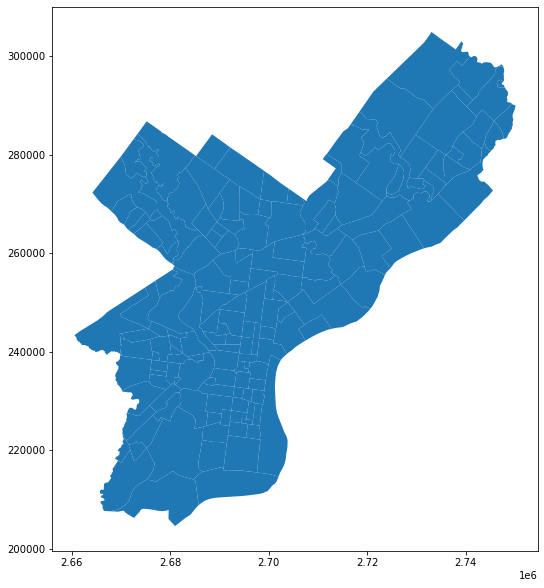

In [5]:
df.plot(figsize=(15,10));

## Task 2. Read CSV file with Pandas and convert to GeoDataFrame 


<div class="alert alert-block alert-info">
    
<b>Instructions:</b> 


* <span style='font-family:Georgia'> Read the incidents.csv file with Pandas: The data is stored in the Workshop2Data folder.
    
 
* <span style='font-family:Georgia'> Show a sample of rows from the DataFrame.
</div>

In [6]:
df1=pd.read_csv("incidents.csv")

In [7]:
df_gdf = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1.lng, df1.lat))

This is a pandas dataframe which needs to be converted into a GeoDataframe. 

<div class="alert alert-block alert-info">
    
<b>Instructions:</b> 


* <span style='font-family:Georgia'> First find the column names for the coordinates (latitude and longitude columns).
    
* <span style='font-family:Georgia'> Convert the Dataframe to GeodataFrame using gpd.GeoDataFrame(). 
    
* <span style='font-family:Georgia'> After converting the DataFrame to a GeoDataframe, a geometry column will be included in the dataset. 




In [8]:
df_gdf.head()

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng,geometry
0,129,9,2,25/03/2020 18:32,25/03/2020,18:32:00,18,2.020090e+11,1400 BLOCK SPRING GARDEN ST,600,Theft from Vehicle,-75.161446,39.962334,39.962334,-75.161446,POINT (-75.16145 39.96233)
1,41,77,A,08/03/2020 19:08,08/03/2020,19:08:00,19,2.020770e+11,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706,POINT (-75.23071 39.88388)
2,42,77,A,15/03/2020 18:41,15/03/2020,18:41:00,18,2.020770e+11,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706,POINT (-75.23071 39.88388)
3,43,77,A,18/03/2020 08:17,18/03/2020,08:17:00,8,2.020770e+11,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706,POINT (-75.23071 39.88388)
4,44,77,A,03/04/2020 15:32,03/04/2020,15:32:33,15,2.020770e+11,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706,POINT (-75.23071 39.88388)


In [9]:
df_gdf["geometry"].head()

0    POINT (-75.16145 39.96233)
1    POINT (-75.23071 39.88388)
2    POINT (-75.23071 39.88388)
3    POINT (-75.23071 39.88388)
4    POINT (-75.23071 39.88388)
Name: geometry, dtype: geometry

<div class="alert alert-block alert-info">
<span style='font-family:Georgia'> 
Plot the GeoDataFrame with geopandas .plot() method

</div>

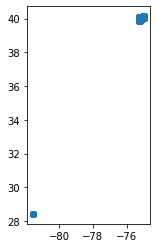

In [10]:
df_gdf.plot();


<div class="alert alert-block alert-danger">
<b>Please note:</b> It appears that some points are outliers, probably in another city. Can you remove them?.
</div>

<div class="alert alert-block alert-info">
<span style='font-family:Georgia'> 
One way to remove these outliers is to put some conditions on the lat. For example, Try to use indexing such as, "lat"> 38. It should work in this case. After removing these outliers you should re-plot to see the results.

</div>

In [11]:
gdf_clean = df_gdf[(df_gdf["lat"] > 38)]

<div class="alert alert-block alert-info">
<span style='font-family:Georgia'> 
Plot the cleaned GeoDataFrame with geopandas .plot() method

</div>

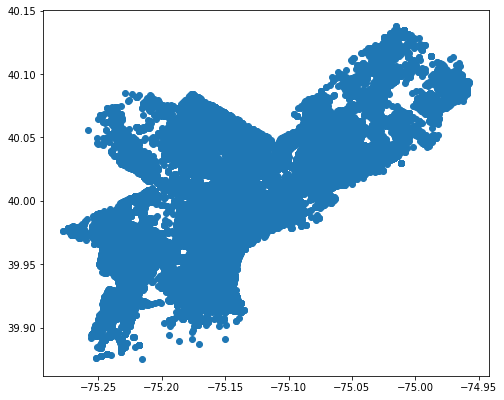

In [13]:
gdf_clean.plot(figsize=(8,8));



<div class="alert alert-block alert-info">
<span style='font-family:Georgia'> 
Save the cleaned data to the Workshop2Data Folder: call it incidents_clean.shp.

</div>

In [15]:
gdf_clean.to_file("incidents_clean.shp")

/tmp/ipykernel_323161/1252255235.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_clean.to_file("incidents_clean.shp")


# Workshop deliverable (Non-assessed activity)

You are required to submit a copy of this solved Jupyter notebook through the Workshop 3 Submission Point on the Moodle. Since this is a teamwork so your work will most likely be identical to your team members. Despite that each team member should submit independently.